## Seattle Fatal Police Encounters

### Motivation
The death of George Floyd sparked major protests across Seattle that lasted for more than 100 days.  As a resident of Seattle I wanted to better understand how often this type of event happens in Seattle and how we compare to other cities. I also wanted to have some sense as to if the size of police force has a positive or negative relationship with fatal police encountres?  My hypothesises are that Seattle 1/ has a low rate of fatal police encounter incidents, and 2/ that policing is a complex topic and defunding is not the silver bullet that some protestors think it is. 

Specifically I would like to answer these 3 questions:

1. How many peoplein Seattle die annually in encounters with police?
2. How does Seattle compare to other similar cities across the United States?
3. Is defunding the police the right decision?

A complete write up of the project motivation, modeling, and evaluation can be found here: https://medium.com/@jacobsworld/seattle-where-do-we-go-from-here-a-data-driven-look-at-fatal-police-encounters-4917adf67a76#443d-f0973affaf73


### Data Understanding
The starting point for my analysis was the discovery of the fatal encounters database maintained by the site fatalencounters.org. The source includes fatal police encounters since January 1st, 2000.  The table consists of 29 columns and 28,570 rows.
https://fatalencounters.org/

In [127]:
#Define local working drive
import os
os.chdir("")

In [128]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #data visualization
import sys

#supress warnings
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [129]:
#read data
fatal_df = pd.read_csv('data/fatal_encounters.csv')

In [130]:
fatal_df.shape

(28570, 29)

In [131]:
#Sample 5 records from the Fatal Encounters Database
fatal_df.head()

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Intentional Use of Force (Developing),Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
0,25746.0,Samuel H. Knapp,17,Male,European-American/White,European-American/White,Not imputed,NaN,01/01/2000,27898-27804 US-101,...,Samuel Knapp was allegedly driving a stolen ve...,Unreported,Vehicle/Pursuit,https://drive.google.com/file/d/10DisrV8K5ReP1...,No,NaN,1/1/2000: Samuel Knapp was allegedly driving a...,NaN,25746.0,2000
1,25747.0,Mark A. Horton,21,Male,African-American/Black,African-American/Black,Not imputed,NaN,01/01/2000,Davison Freeway,...,Two Detroit men killed when their car crashed ...,Unreported,Vehicle/Pursuit,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25747.0,2000
2,25748.0,Phillip A. Blurbridge,19,Male,African-American/Black,African-American/Black,Not imputed,NaN,01/01/2000,Davison Freeway,...,Two Detroit men killed when their car crashed ...,Unreported,Vehicle/Pursuit,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25748.0,2000
3,25749.0,Mark Ortiz,23,Male,Hispanic/Latino,Hispanic/Latino,Not imputed,NaN,01/01/2000,600 W Cherry Ln,...,A motorcycle was allegedly being driven errati...,Unreported,Vehicle/Pursuit,https://drive.google.com/file/d/1qAEefRjX_aTtC...,No,NaN,1/1/2000: A motorcycle was allegedly being dri...,NaN,25749.0,2000
4,1.0,LaTanya Janelle McCoy,24,Female,African-American/Black,African-American/Black,Not imputed,NaN,01/02/2000,5700 block Mack Road,...,LaTanya Janelle McCoy's car was struck from be...,Unknown,Vehicle/Pursuit,http://www.recordnet.com/article/20000110/A_NE...,No,NaN,1/2/2000: LaTanya Janelle McCoy's car was stru...,NaN,1.0,2000


As part of this analysis I wanted to explore the distribution of fatal encounters by race.  In the data I identified two fields related to the subject's race - "Subject's race" and "Subject's race with imputations". The site unfortunately doesn't provide a data dictionary so I start by looking the % of missing values in each field.

In [132]:
pd.DataFrame(1-(fatal_df.count() / len(fatal_df))).round(3)*100 #calculate the percent of missing missing values
fatal_df[pd.isnull(fatal_df).any(axis=1)] #indentify rows with missing values

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Intentional Use of Force (Developing),Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
0,25746.0,Samuel H. Knapp,17,Male,European-American/White,European-American/White,Not imputed,NaN,01/01/2000,27898-27804 US-101,...,Samuel Knapp was allegedly driving a stolen ve...,Unreported,Vehicle/Pursuit,https://drive.google.com/file/d/10DisrV8K5ReP1...,No,NaN,1/1/2000: Samuel Knapp was allegedly driving a...,NaN,25746.0,2000
1,25747.0,Mark A. Horton,21,Male,African-American/Black,African-American/Black,Not imputed,NaN,01/01/2000,Davison Freeway,...,Two Detroit men killed when their car crashed ...,Unreported,Vehicle/Pursuit,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25747.0,2000
2,25748.0,Phillip A. Blurbridge,19,Male,African-American/Black,African-American/Black,Not imputed,NaN,01/01/2000,Davison Freeway,...,Two Detroit men killed when their car crashed ...,Unreported,Vehicle/Pursuit,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25748.0,2000
3,25749.0,Mark Ortiz,23,Male,Hispanic/Latino,Hispanic/Latino,Not imputed,NaN,01/01/2000,600 W Cherry Ln,...,A motorcycle was allegedly being driven errati...,Unreported,Vehicle/Pursuit,https://drive.google.com/file/d/1qAEefRjX_aTtC...,No,NaN,1/1/2000: A motorcycle was allegedly being dri...,NaN,25749.0,2000
4,1.0,LaTanya Janelle McCoy,24,Female,African-American/Black,African-American/Black,Not imputed,NaN,01/02/2000,5700 block Mack Road,...,LaTanya Janelle McCoy's car was struck from be...,Unknown,Vehicle/Pursuit,http://www.recordnet.com/article/20000110/A_NE...,No,NaN,1/2/2000: LaTanya Janelle McCoy's car was stru...,NaN,1.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28565,28566.0,Julian Edward Roosevelt Lewis,60,Male,Race unspecified,NaN,NaN,NaN,08/07/2020,Stoney Pond Road,...,A trooper shot and killed Julian Edward Roosev...,Pending investigation,Intentional use of deadly force,https://wgxa.tv/news/local/gbi-investigating-f...,No,NaN,8/7/2020: A trooper shot and killed Julian Edw...,NaN,28566.0,2020
28566,28567.0,Name withheld by police,NaN,Male,European-American/White,European-American/White,Not imputed,NaN,08/08/2020,2640 N. 1700 West,...,An officer initiated a traffic stop around 2 a...,Pending investigation,Intentional use of deadly force,https://ksltv.com/443014/man-dead-another-in-c...,No,NaN,8/8/2020: An officer initiated a traffic stop ...,NaN,28567.0,2020
28567,28568.0,Johnathan Randell,25,Male,Race unspecified,NaN,NaN,NaN,08/08/2020,2440 North Harvard Avenue,...,Police responded to a report of a man trying t...,Pending investigation,Intentional use of deadly force,https://tulsaworld.com/news/local/police-inves...,Yes,NaN,8/8/2020: Police responded to a report of a ma...,NaN,28568.0,2020
28568,28569.0,Name withheld by police,NaN,Male,Race unspecified,NaN,NaN,NaN,08/08/2020,Plaza Circle and Preston Boulevard,...,Police shot and killed a person in Bossier Cit...,Pending investigation,Intentional use of deadly force,https://www.ktbs.com/news/la-state-police-inve...,No,NaN,8/8/2020: Police shot and killed a person in B...,NaN,28569.0,2020


#### Determining the appropriate Race field to use

The % of NaN or Null values for both race specific fields are low.  This is because the missing values have been replaced with the value 'Race unspecified' as can be seen when we look at the count of the values in each field. With this information we can see that the "Subject's race" contains 8814 missing values and the  "Subject's race with imputations" containts 1407 missing values. I have choosen to use the "Subject's race with imputations" going forward in the analysis.

In [133]:
#Subject's Race - known

pd.DataFrame(fatal_df["Subject's race"].value_counts())

,Subject's race
European-American/White,9230
Race unspecified,8814
African-American/Black,6083
Hispanic/Latino,3677
Asian/Pacific Islander,433
Native American/Alaskan,283
Middle Eastern,49


In [134]:
#Subject's Race - Inputted 
pd.DataFrame(fatal_df["Subject's race with imputations"].value_counts())

,Subject's race with imputations
European-American/White,13676
African-American/Black,7771
Hispanic/Latino,4704
Race unspecified,1407
Asian/Pacific Islander,532
Native American/Alaskan,277
Middle Eastern,49


#### Incidents of Interest
In reading through some of the circumstances surrounding the deaths, I noticed that there were a number of cases related to auto accidents and suicide as can be seen in the print outs below.  We can see in the bar plot that these incidents make up more than 30% of the encounters.  While tragic and unfortunate, I didn't feel they represented scenarios comparable to what sparked recent protests and thus I excluded from my analysis.


In [135]:
#print out of 5 circumstances surrounding the deatths
lis = fatal_df["A brief description of the circumstances surrounding the death"][0:5].tolist()
[print(x) for x in lis]

Samuel Knapp was allegedly driving a stolen vehicle when Deputies Scott Nording and Mike Davis started to pursue him. He crashed and was killed during the pursuit about 12:35 a.m.
Two Detroit men killed when their car crashed were among at least eight people who died in New Year's holiday weekend traffic accidents in Michigan, police said. Mark A Horton, 21, and passenger Phillip A. Blurbridge, 19, were killed when their car crashed in their hometown at 1:54 a.m. They were not wearing seat belts. While these deaths were not reported in news media as police pursuit deaths, National Highway Traffic Safety Administration data shows police reported two people dying in a police pursuit at 1:54 a.m. on January 1, 2000, on Davison Freeway. It was the only double fatality crash in Michigan that night.
Two Detroit men killed when their car crashed were among at least eight people who died in New Year's holiday weekend traffic accidents in Michigan, police said. Mark A Horton, 21, and passenger 

[None, None, None, None, None]

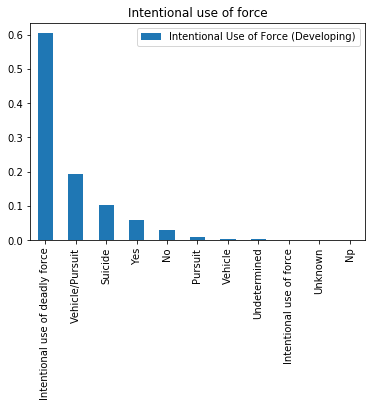

In [136]:
#Distribution of records by values in the Intentional Use of Force (Developing) column
status_vals = pd.DataFrame(fatal_df['Intentional Use of Force (Developing)'].value_counts())
(status_vals/fatal_df.shape[0]).plot(kind="bar")
plt.title("Intentional use of force")
plt.show();

In [137]:
#filter data to exclude Suice and Vehicle/Persuit, Persuit, or Vehicle related incidents
fatal_df = fatal_df[fatal_df['Intentional Use of Force (Developing)'].isin([
    'Intentional use of deadly force','Intentional use of force','Yes', 'Undetermined', 'Unknown'])]

#Set data type to date
fatal_df[['Date of injury resulting in death (month/day/year)']] = fatal_df[['Date of injury resulting in death (month/day/year)']].apply(pd.to_datetime)
fatal_df['Date (Month)'] = pd.DatetimeIndex(fatal_df['Date of injury resulting in death (month/day/year)']).month

In [138]:
city="Seattle"

#define the range of dates we are interested in
full_index = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

#filter fatality data based on target city
fatal_df_sea = fatal_df[fatal_df['Location of death (city)'] == city] #filter fatality data based on target city
fatal_df_by_year = pd.DataFrame(fatal_df_sea[['Unique ID','Date (Year)']].groupby(by=['Date (Year)']).count()) #group and count number of fatalities by year
fatal_df_by_year = fatal_df_by_year.rename(columns={'Unique ID': 'Count', 'Year': 'Year'}) #rename columns
fatal_df_by_year = fatal_df_by_year.reindex(full_index) #reindex to align with the full_index spine
fatal_df_by_year['Year'] = fatal_df_by_year.index 
fatal_df_by_year = fatal_df_by_year.fillna(0) #fill NaN values with 0

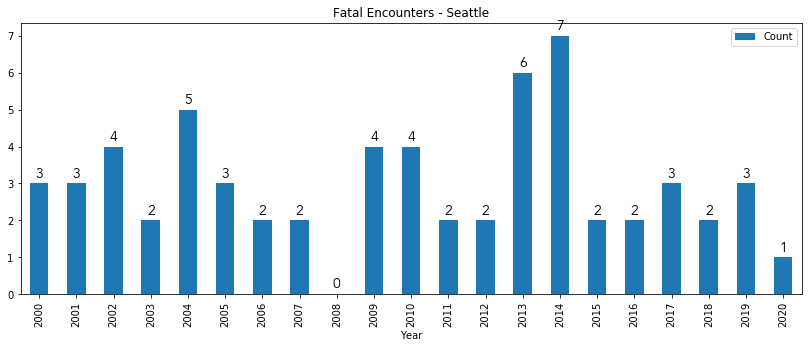

In [139]:
#Plot Seattle incidents per year

# Define plot
plot1 = fatal_df_by_year.plot.bar(x="Year", y="Count", figsize=(14,5))

plt.title('Fatal Encounters - {}'.format(city))

#add column annotations to show the count of deaths in the given year
for p in plot1.patches:
    plot1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha = 'center', va = 'center', fontsize=14, xytext = (0, 10), textcoords = 'offset points',**csfont)

plt.show()

In [140]:
#Re-pivot data to include race on the x axis and year on the y axis
fatal_df_by_year2 = pd.DataFrame(fatal_df_sea.pivot_table(index='Date (Year)', columns="Subject's race with imputations", values='Unique ID', aggfunc='count'))
fatal_df_by_year2 = fatal_df_by_year2.reindex(full_index) #reindex to account for years with zero records
fatal_df_by_year2 = fatal_df_by_year2.fillna(0) #fill NaN with 0

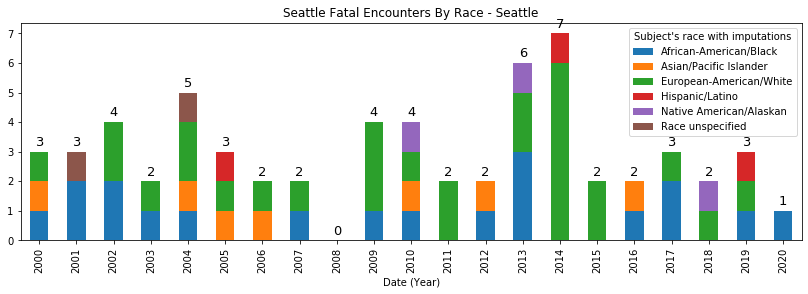

In [141]:
#Plot Seattle incidents per year with race

#Define plot
plot2 = fatal_df_by_year2.plot.bar(stacked=True, figsize=[14,4])

plt.title('Seattle Fatal Encounters By Race - {}'.format(city))

#add column annotations to show the count of deaths in the given year
for i in range(0,21):
     formula = plot2.text(i, (int(fatal_df_by_year2.iloc[[i]].sum(axis=1))+.2), int(fatal_df_by_year2.iloc[[i]].sum(axis=1)), style)
     formula

plt.show()

In [142]:
#Distribution of Seattle fatal police encounters by race as a percent of total
pd.DataFrame(fatal_df["Subject's race with imputations"].value_counts()/fatal_df.shape[0])


,Subject's race with imputations
European-American/White,0.467942
African-American/Black,0.283968
Hispanic/Latino,0.180496
Race unspecified,0.029714
Asian/Pacific Islander,0.020073
Native American/Alaskan,0.011538
Middle Eastern,0.002107
